In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
suic_rates = pd.read_csv("master.csv")
suic_rates

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


## Knowledge Discovery Process

We start by looking at the data to study its distribution, find outliers, show rankings for relevant metrics, and analyze correlation between variables. The first step is to visualize the `suicides/100k pop` column and look for outliers. We chose to look at the `suicides/100k pop` column because this is a more robust measure than the `suicides_no` column, given that we can expect a country with more individuals to have higher suicide rates.

First of all, we need to acknowledge that the objects are partitioned in different classes (country, year, sex, and age forms a partition of the data). To make sure we are not dealing with some sort of Simpson's paradox, let's look at each part individually.

We would like to look at the following joint distributions, searching for anomalies and outliers:
- Suicide rates per year, overall
- Suicide rates per age ranges, overall
- Suicide rates per sex, overall
- Suicide rates per year, per country
- Suicide rates per year, per sex
- Suicide rates per country, per sex
- Suicide rates per age, per country
- Suicide rates per age, per sex

In [112]:
suic_rates_year_overall = suic_rates.groupby(["year"], as_index = False)["suicides/100k pop"].sum()
suic_rates_age_overall = suic_rates.groupby(["age"], as_index = False)["suicides/100k pop"].sum()
suic_rates_sex_overall = suic_rates.groupby(["sex"], as_index = False)["suicides/100k pop"].sum()
suic_rates_year_country = suic_rates.groupby(["year", "country"], as_index = False)["suicides/100k pop"].sum()
suic_rates_year_sex = suic_rates.groupby(["year", "sex"], as_index = False)["suicides/100k pop"].sum()
suic_rates_country_sex = suic_rates.groupby(["country", "sex"], as_index = False)["suicides/100k pop"].sum()
suic_rates_age_country = suic_rates.groupby(["country", "age"], as_index = False)["suicides/100k pop"].sum()
suic_rates_age_sex = suic_rates.groupby(["age", "sex"], as_index = False)["suicides/100k pop"].sum()

Text(0.5, 1.0, 'Suicide Rates per age, sex')

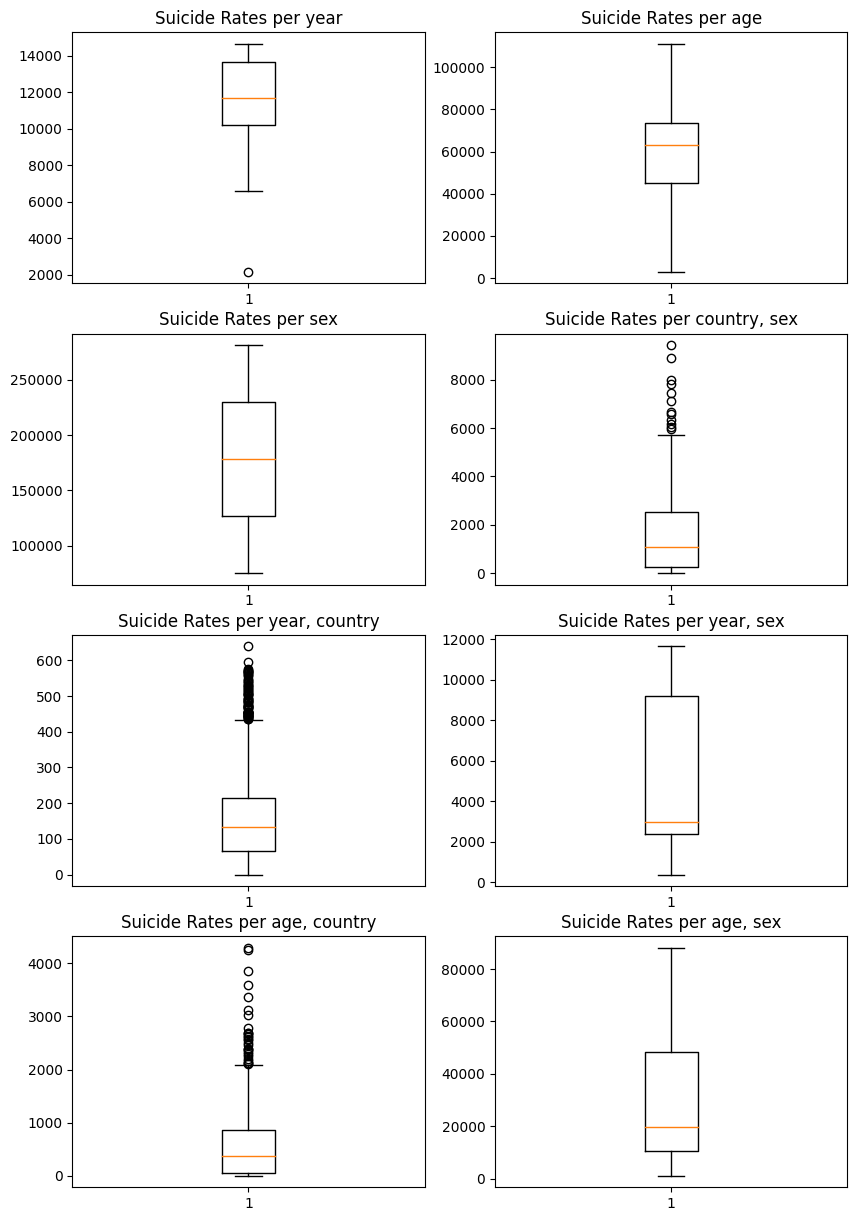

In [115]:
fig, axs = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(10)

axs[0, 0].boxplot(suic_rates_year_overall["suicides/100k pop"])
axs[0, 0].set_title('Suicide Rates per year')

axs[0, 1].boxplot(suic_rates_age_overall["suicides/100k pop"])
axs[0, 1].set_title('Suicide Rates per age')

axs[1, 0].boxplot(suic_rates_sex_overall["suicides/100k pop"])
axs[1, 0].set_title('Suicide Rates per sex')

axs[1, 1].boxplot(suic_rates_country_sex["suicides/100k pop"])
axs[1, 1].set_title('Suicide Rates per country, sex')

axs[2, 0].boxplot(suic_rates_year_country["suicides/100k pop"])
axs[2, 0].set_title('Suicide Rates per year, country')

axs[2, 1].boxplot(suic_rates_year_sex["suicides/100k pop"])
axs[2, 1].set_title('Suicide Rates per year, sex')


axs[3, 0].boxplot(suic_rates_age_country["suicides/100k pop"])
axs[3, 0].set_title('Suicide Rates per age, country')

axs[3, 1].boxplot(suic_rates_age_sex["suicides/100k pop"])
axs[3, 1].set_title('Suicide Rates per age, sex')

Particularly, for suicide rates per year and country, for suicide rates per country and sex, and for suicide rates per age and country, we notice quite a few outliers. Note that an outlier for these combinations indicates that the suicide rates for **a combination of `year` and `country`** is an anomaly, the suicide rates for **a combination of `country` and `sex`** is an anomaly, and the **combination of `age` and `country`** is an anomaly, respectively.

With that said, let's see which objects in our data correspond to those points.

In [117]:
outliers_year_country = suic_rates_year_country.sort_values(by="suicides/100k pop", ascending=False)[:10]
outliers_country_sex = suic_rates_country_sex.sort_values(by="suicides/100k pop", ascending=False)[:10]
outliers_age_country = suic_rates_age_country.sort_values(by="suicides/100k pop", ascending=False)[:10]

outliers_year_country["year-country"] = outliers_year_country.apply(lambda row: str(row.year) + "-" + row.country, axis=1)
outliers_country_sex["country-sex"] = outliers_country_sex.apply(lambda row: row.country + "-" + row.sex, axis=1)
outliers_age_country["age-country"] = outliers_age_country.apply(lambda row: row.country + "-" + row.age, axis=1)

### TO-DO: Add heatmap to the vertical bar plot below?

In [ ]:
fig, ax = plt.subplots(3, 1)

norm = plt.Normalize(
    outliers_year_country["suicides/100k pop"].values.min(),
    outliers_year_country["suicides/100k pop"].values.max()
)
colors = plt.cm.autumn(norm(outliers_year_country["suicides/100k pop"]))
ax[0].barh(outliers_year_country["year-country"], outliers_year_country["suicides/100k pop"], color=colors)
ax[0].set_title("Outliers for suicide rates grouped by year and country")
ax[0].invert_yaxis()

norm = plt.Normalize(
    outliers_country_sex["suicides/100k pop"].values.min(),
    outliers_country_sex["suicides/100k pop"].values.max()
)
colors = plt.cm.copper_r(norm(outliers_country_sex["suicides/100k pop"]))
ax[1].barh(outliers_country_sex["country-sex"], outliers_country_sex["suicides/100k pop"], color=colors)
ax[1].set_title("Outliers for suicide rates grouped by country and sex")
ax[1].invert_yaxis()

norm = plt.Normalize(
    outliers_age_country["suicides/100k pop"].values.min(),
    outliers_age_country["suicides/100k pop"].values.max()
)
colors = plt.cm.copper_r(norm(outliers_age_country["suicides/100k pop"]))
ax[2].barh(outliers_age_country["age-country"], outliers_age_country["suicides/100k pop"], color=colors)
ax[2].set_title("Outliers for suicide rates grouped by age and country")
ax[2].invert_yaxis()

 

fig.set_figheight(13)

Surprisingly, we see that the top 10 suicide rates grouped by country and sex do not show a specific tendency for country, but they are all males. Let's explore the relation between sex and suicide rates. Furthermore, we can see the highest rates for the country and age combination correspond to individuals with more than 75 years.

Now that we have highlighted the distributions of interest, and studied the anomalies, we will dive deeper into how the variables are correlated. Establishing a relation between the available variables and the suicide rate is important in order to find vulnerable countries and individuals and stablish policies that will help them. We start by studying the correlation between sex and suicide rates.

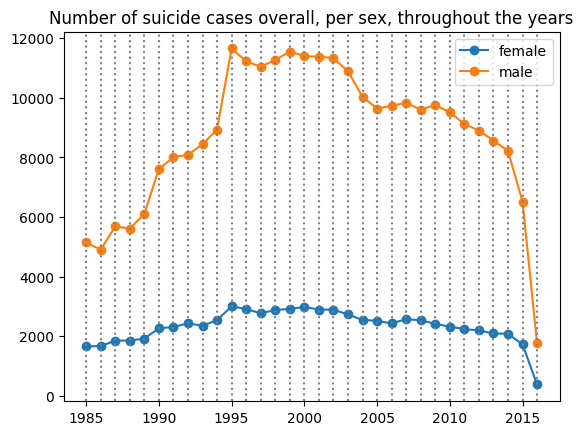

In [143]:
suic_rates_year_sex_female = suic_rates_year_sex.loc[suic_rates_year_sex["sex"] == "female"]
suic_rates_year_sex_male = suic_rates_year_sex.loc[suic_rates_year_sex["sex"] == "male"]

plt.plot(
    suic_rates_year_sex_female["year"],
    suic_rates_year_sex_female["suicides/100k pop"],
    marker='o',
    label="female"
)
plt.plot(
    suic_rates_year_sex_male["year"],
    suic_rates_year_sex_male["suicides/100k pop"],
    marker='o',
    label="male"
)

for year in suic_rates_year_sex_female["year"]:
    plt.axvline(x=year, linestyle="dotted", color="grey")
    
plt.title("Number of suicide cases overall, per sex, throughout the years")
plt.legend()

Here we can notice a strong tendency showing us that individuals of the sex `male` are more likely to commit suicide, if we look at the whole world, throughout the years. Again, let's dive deeper into this analysis in order to avoid common mistakes such as the Simpson's Paradox.

We proceed by analyzing suicide cases per sex age, followed by suicide cases per country.

### TO-DO: Interactive visualization -- (line plot) suicide rates per sex, throughout the years, filter per country

Now that we have studied the correlation between sex and suicide rates, let's take a look at the correlation between age and suicide rates.

### TO-DO: Bar plot of mean suicide rates per age, across all countries
Include confidence interval in bar plot?

### TO-DO: Compare suicide rates per age group per year in some way?

Finally, let's look at how the GDP relates to the suicide rates of the countries, throughout the years. Similarly to what we have done with the suicide rates, we will look at the GDP per capita, which is a measure that already performs a sort of normalization of the GDP according to the population.

### TO-DO: Line plot with GDP per capita and suicide rates for each pair country-year?